In [2]:
%pylab
%matplotlib inline
import pandas as pd
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets.widgets import Text, FloatSlider, IntSlider, RadioButtons
from ipywidgets.widgets import Checkbox

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [3]:
text = Text()

def handle_submit(whatever):
    print(whatever.value.upper())
#    print("WHATEVER:", whatever)

text.on_submit(handle_submit)
display(text)

Widget Javascript not detected.  It may not be installed or enabled properly.


Let's read in the data.

In [4]:

sns.set_style('dark')

df = pd.read_csv(
    '../DATA/airport_boardings.csv',
    thousands=',',
    skipinitialspace=True,
)

df.head()


,Airport,Code,2001 Rank,2001 Total,2010 Rank,2010 Total,2011 Rank,Total,Percent change 2001-2011,Percent change 2010-2011
0,"Atlanta, GA (Hartsfield-Jackson Atlanta Intern...",ATL,1,36384264,1,42655392,1,33034788,-9.2,-22.6
1,"Chicago, IL (Chicago O'Hare International)",ORD,2,28626694,2,30033313,2,22367052,-21.9,-25.5
2,"Dallas, TX (Dallas/Fort Worth International)",DFW,3,25198256,3,26785739,3,20430281,-18.9,-23.7
3,"Denver, CO (Denver International)",DEN,6,16397390,4,24965553,4,19190341,17.0,-23.1
4,"Los Angeles, CA (Los Angeles International)",LAX,4,22873307,5,22860849,5,18379418,-19.6,-19.6


Now let's plot the data

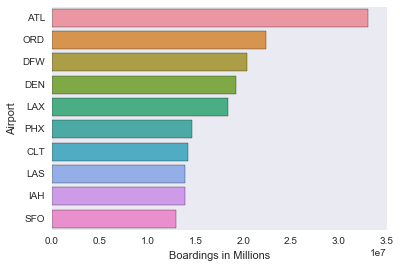

In [5]:
FIELD_TO_PLOT = 'Total'
NUM_ENTRIES = 10


sns.barplot(df[FIELD_TO_PLOT], df['Code'][:NUM_ENTRIES])

plt.xlabel('Boardings in Millions')
plt.ylabel('Airport')

plt.show()

So far so good. 
Now we want to add a slider widget. 

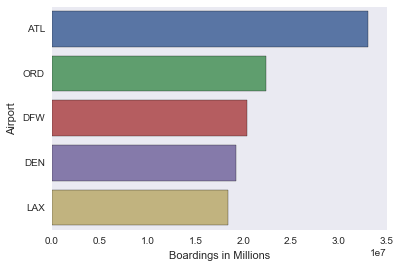

In [6]:
min_entries = 5
max_entries = len(df)


def f(num_entries):
    ax = sns.barplot(df[FIELD_TO_PLOT], df['Code'][:num_entries])
    ax.set(xlabel='Boardings in Millions', ylabel='Airport')
    plt.show()


slider = IntSlider(min=min_entries, max=max_entries,step=1,value=min_entries)
interact(f, num_entries=slider);


In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot(amplitude, color, fat_line):
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    x = np.linspace(0, 10, 1000)
    ax.plot(x, amplitude * np.sin(x), color=color,
            lw=5 if fat_line else 1, alpha=0.4)
    ax.set_ylim(-1.1, 1.1)
    plt.show()
#     return fig


interact(
    plot,
    amplitude=FloatSlider(min=0.0, max=1, step=0.1, value=0.1),
    color=RadioButtons(options=['blue', 'green', 'red']),
    fat_line=Checkbox(value=False, label="Fat Line"),
)

AttributeError: Unknown property facecolor

<function __main__.plot>